In [ ]:
!pip install hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import hdbscan
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Cargar datos
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)

# Eliminar columnas irrelevantes
df = df.drop(df.columns[[0, -1, 10, 11]], axis=1)

# Eliminar filas con NaN en 'Survival Time (years)'
df = df.dropna(subset=['Survival Time (years)'], axis=0)

# Identificar variables numéricas y categóricas
numeric_vars = ['Age at Diagnosis', 'Survival Time (years)']
categorical_vars = ['Sex', 'Race', 'Definition', 'Menopausal Status', 'Cancer Type',
                    'ER', 'PR', 'HER2', 'Survival Status', 'Subtype', 'Genetic Ancestry']

# Convertir variables categóricas a números antes de escalar
for col in categorical_vars:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalizar datos numéricos
scaler = MinMaxScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

# Aplicar HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean')
df['Cluster'] = clusterer.fit_predict(df)

# Visualización en 3D con Plotly
fig = px.scatter_3d(df,
                    x=pca_result[:, 0],
                    y=pca_result[:, 1],
                    z=pca_result[:, 2],
                    color=df['Cluster'].astype(str),
                    title="Clustering con HDBSCAN y PCA en 3D",
                    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2', 'z': 'Componente Principal 3'})

fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cancer Type   0   1   2   3   4   5   6    7   8   9   ...  37  38  39  40  \
Cluster                                                ...                   
-1           309   0   2   1  13   2   5  106   1   1  ...   0   1   1   1   
 0             0   0   0   0   0   0   0    0   0   0  ...   1   0   0   0   
 1             0   0   0   0  16   0   0    0   0   0  ...   0   0   0   0   
 2            10   1   0   0   0   0   0    0   0   0  ...   0   0   0   0   
 3             0   0   0   0   0   0   0   10   0   0  ...   0   0   0   0   
 4             0   0   0   0   0   0   0   28   0   0  ...   0   0   0   0   
 5            20   0   0   0   0   0   0    0   0   0  ...   0   0   0   0   
 6            43   0   0   0   0   0   0    0   0   0  ...   0   0   0   0   
 7            17   0   0   0   0   0   0    0   0   0  ...   0   0   0   0   
 8            37   0   0   0   0   0   0    0   0   0  ...   0   0   0   0   
 9            14   0   0   0   0   0   0    0   0   0  ...   0  

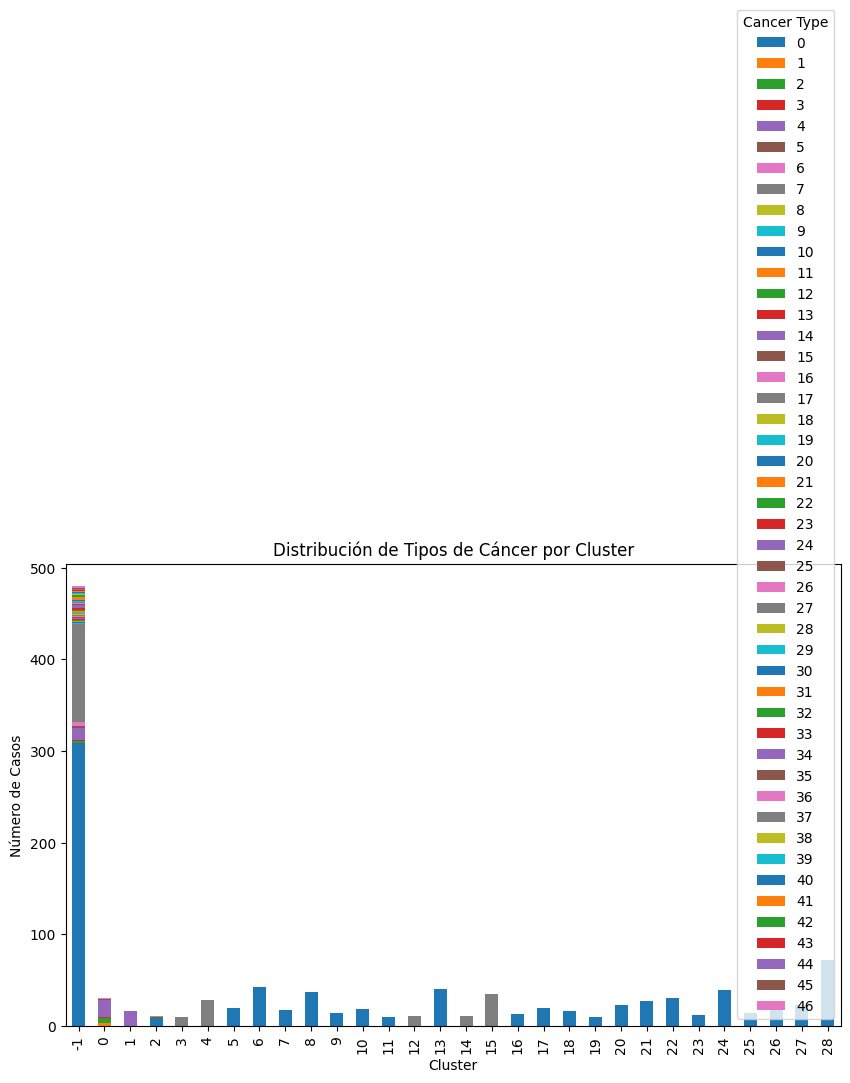

In [ ]:
# Contar los tipos de cáncer en cada cluster
cancer_distribution = df.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)

# Imprimir la distribución de tipos de cáncer por cluster
print(cancer_distribution)

# Opcional: Visualización de la distribución con un gráfico de barras
cancer_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Tipos de Cáncer por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Casos')
plt.legend(title='Cancer Type')
plt.show()

In [ ]:
# Ver cuántas muestras hay en cada clúster
print(df['Cluster'].value_counts())

# Ver estadísticas descriptivas por clúster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)



Cluster
-1     480
 28     72
 6      43
 13     40
 24     39
 8      37
 15     35
 0      31
 22     31
 4      28
 21     27
 27     23
 20     23
 5      20
 17     20
 10     19
 26     19
 7      17
 18     16
 1      16
 25     14
 9      14
 16     13
 23     12
 2      11
 14     11
 12     11
 11     10
 19     10
 3      10
Name: count, dtype: int64
         Age at Diagnosis       Sex      Race  Definition  Menopausal Status  \
Cluster                                                                        
-1               0.483333  0.027083  1.787500    0.120833           4.412500   
 0               0.611367  0.000000  1.709677    0.064516           5.161290   
 1               0.448413  0.000000  2.000000    0.375000           5.250000   
 2               0.451659  0.000000  1.000000    0.090909           5.454545   
 3               0.611111  0.000000  2.000000    0.000000           5.200000   
 4               0.616780  0.000000  2.035714    0.000000           4.964286

In [ ]:
# Obtener las cargas de cada variable en los componentes principales
pca_loadings = pd.DataFrame(pca.components_, columns=df.columns[:-1])  # Excluye la columna 'Cluster'
print(pca_loadings.T)

                              0         1         2
Age at Diagnosis       0.002838  0.010876  0.001621
Sex                   -0.000244  0.002061  0.009044
Race                  -0.001659  0.229515 -0.052376
Definition            -0.001769  0.016657 -0.010762
Menopausal Status      0.007172 -0.041640  0.152605
Cancer Type            0.996886 -0.021128 -0.067030
ER                     0.005175  0.159825  0.316379
PR                     0.005610  0.169242  0.322941
HER2                  -0.006873  0.028893 -0.248088
Survival Status        0.001713  0.002587 -0.021543
Survival Time (years)  0.000505  0.001566 -0.005832
Subtype                0.077671  0.220033  0.790949
Genetic Ancestry       0.003344  0.917222 -0.277926


Cluster 0: Está fuertemente influenciado por el tipo de cáncer (Cancer Type).

Cluster 1: Está influenciado por la raza (Race), el estado del receptor de estrógeno (ER), el estado del receptor de progesterona (PR), y la ancestría genética (Genetic Ancestry).

Cluster 2: Está influenciado por el estado menopáusico (Menopausal Status), el estado del receptor de estrógeno (ER), el estado del receptor de progesterona (PR), y el subtipo de cáncer (Subtype).


In [ ]:
# analsis cluster 0
cluster_data = df[df['Cluster'] == 0]
descriptive_stats = cluster_data.describe()
print(descriptive_stats)

# Ver qué tipos de cáncer tiene el clúster 0
df[df['Cluster'] == 0]['Cancer Type'].value_counts()

from sklearn.preprocessing import LabelEncoder

# Crear un nuevo LabelEncoder y ajustarlo a los valores originales
le = LabelEncoder()
df2 = pd.read_excel('MetaData.xlsx')
le.fit(df2['Cancer Type'])  # Usa los datos originales antes de la transformación

# Obtener el nombre del tipo de cáncer con valor 34
cancer_type_34 = le.inverse_transform([34])
print(cancer_type_34)

# Imprimir el mapeo completo de valores originales a números
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)


import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona una variable y compara su distribución en cada clúster
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cluster'], y=df['Cancer Type'])
plt.title('Distribución del Cancer Type por Clúster')
plt.show()



       Age at Diagnosis   Sex       Race  Definition  Menopausal Status  \
count         31.000000  31.0  31.000000   31.000000          31.000000   
mean           0.611367   0.0   1.709677    0.064516           5.161290   
std            0.236072   0.0   0.588419    0.249731           0.454369   
min            0.111111   0.0   0.000000    0.000000           4.000000   
25%            0.444444   0.0   2.000000    0.000000           5.000000   
50%            0.650794   0.0   2.000000    0.000000           5.000000   
75%            0.809524   0.0   2.000000    0.000000           5.000000   
max            0.936508   0.0   2.000000    1.000000           6.000000   

       Cancer Type         ER         PR       HER2  Survival Status  \
count    31.000000  31.000000  31.000000  31.000000        31.000000   
mean     33.483871   2.548387   2.548387   2.225806         0.225806   
std       1.387347   0.809885   0.809885   0.844972         0.425024   
min      31.000000   1.000000   1.00

Los carcinomas micropapilares tienden a ser más invasivos y pueden tener un peor pronóstico en comparación con otros tipos de carcinoma que presentan un patrón de crecimiento diferente. Se ha observado que este subtipo puede ser más probable que cause metástasis (diseminación a otros órganos).

Media de Edad alta de .61, desnormalizada 64 años

Tiempo de supervivencia bajo de .10, desnormalizado 0.0487 años, es decir, alrededor de 17.8 días,



In [ ]:
# analsis cluster 9
cluster_data = df[df['Cluster'] == 9]
descriptive_stats = cluster_data.describe()
print(descriptive_stats)

       Age at Diagnosis   Sex  Race  Definition  Menopausal Status  \
count         14.000000  14.0  14.0   14.000000               14.0   
mean           0.289116   0.0   2.0    0.428571                2.0   
std            0.167311   0.0   0.0    0.513553                0.0   
min            0.079365   0.0   2.0    0.000000                2.0   
25%            0.146825   0.0   2.0    0.000000                2.0   
50%            0.301587   0.0   2.0    0.000000                2.0   
75%            0.373016   0.0   2.0    1.000000                2.0   
max            0.682540   0.0   2.0    1.000000                2.0   

       Cancer Type         ER         PR       HER2  Survival Status  \
count         14.0  14.000000  14.000000  14.000000        14.000000   
mean           0.0   2.857143   2.857143   4.428571         0.928571   
std            0.0   0.363137   0.363137   0.513553         0.267261   
min            0.0   2.000000   2.000000   4.000000         0.000000   
25%      

Los pacientes con edad media de 28 años presentan mayores probabilidades de supervivencia

In [ ]:
# Filtrar pacientes por clúster
cluster_0 = df[df["Cluster"] == 0]
cluster_1 = df[df["Cluster"] == 1]
cluster_2 = df[df["Cluster"] == 2]

# Mostrar los primeros pacientes de cada clúster
print("Pacientes en el clúster 0:")
print(cluster_0.head())

print("Pacientes en el clúster 1:")
print(cluster_1.head())

print("Pacientes en el clúster 2:")
print(cluster_2.head())


Pacientes en el clúster 0:
     Age at Diagnosis  Sex  Race  Definition  Menopausal Status  Cancer Type  \
11           0.555556    0     2           0                  5           33   
105          0.333333    0     2           0                  6           34   
116          0.650794    0     1           0                  5           32   
118          0.809524    0     2           0                  5           34   
149          0.714286    0     2           0                  5           34   

     ER  PR  HER2  Survival Status  Survival Time (years)  Subtype  \
11    3   3     2                0               0.050509        5   
105   3   3     2                0               0.093379        5   
116   3   3     2                0               0.086163        5   
118   3   3     2                0               0.081919        5   
149   3   3     2                0               0.039898        5   

     Genetic Ancestry  Cluster  
11                  5        0  
105  

In [ ]:
# Restaurar la columna 'Cancer Type' con sus nombres originales
data['Cluster'] = df['Cluster']  # Añadir la columna de clusters al DataFrame original

# Agrupar por clúster y obtener los tipos de cáncer únicos en cada uno
cluster_cancer_types = data.groupby('Cluster')['Cancer Type'].unique()

# Imprimir los tipos de cáncer en cada clúster
for cluster, cancer_types in cluster_cancer_types.items():
    print(f"Clúster {cluster}: {', '.join(cancer_types)}")


Clúster -1.0: ILC, IDC/mucinous, adenoid cystic carcinoma, IDC/ILC, IDC, \neuroendocrine carcinoma, large-cell type, high-grade\"", apocrine, Infiltrating Tubulolobular Carcinoma, metaplastic carcinoma, ILC/IDC (grade 1), \adenocarcinoma with squamous differentiation, metaplastic\"", infiltrating carcinoma NOS, invasive papillary carcinoma, secretory, ductal/micropapillary, ductal/mucinous, papillary carcinoma, pleomorphic ILC, medullary carcinoma, ILC with ductal features, squamous (metaplastic) carcinoma, ductal/cribiform, IDC with mucinous features, ductal/metaplastic, pleomorphic/lobular, cribiform, with IDC/ILC phenotypes, IDC with metaplastic carcinoma and focal apocrine features, not available, IDC/ILC features, Infiltrating mucinous-papillary ductal carcinoma, papillary, ductal and papillary, ductal partially papillary, tubular carcinoma, infiltrating papillary adenocarcinoma, invasive tubulolobular carcinoma, invasive micropapillary ductal carcinoma, \ILC, classical type, foca